## Detailed EDA - Understanding H&M data

https://www.kaggle.com/datark1/detailed-eda-understanding-h-m-data/notebook

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # nice visualisations
import matplotlib.pyplot as plt # basic visualisation library
import datetime as dt # library to opearate on dates
import matplotlib as mpl

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.3.5
numpy version: 1.21.5
seaborn version: 0.11.2


In [4]:
art = pd.read_csv("/content/drive/MyDrive/kaggle/data/articles.csv")
cust = pd.read_csv("/content/drive/MyDrive/kaggle/data/customers.csv")
trans = pd.read_csv("/content/drive/MyDrive/kaggle/data/transactions_train.csv")

In [3]:
mpl.rcParams.update(mpl.rcParamsDefault)

data = art
art_dtypes = art.dtypes.value_counts()

fig = plt.figure(figsize=(5,2),facecolor='white')

ax0 = fig.add_subplot(1,1,1)
font = 'monospace'
ax0.text(1, 0.8, "Key figures",color='black',fontsize=28, fontweight='bold', fontfamily=font, ha='center')

ax0.text(0, 0.4, "{:,d}".format(data.shape[0]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax0.text(0, 0.001, "# of rows \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax0.text(0.6, 0.4, "{}".format(data.shape[1]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax0.text(0.6, 0.001, "# of features \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax0.text(1.2, 0.4, "{}".format(art_dtypes[0]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax0.text(1.2, 0.001, "# of text columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font, ha='center')

ax0.text(1.9, 0.4,"{}".format(art_dtypes[1]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax0.text(1.9, 0.001,"# of numeric columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)

fig.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#8c8c8c')
fig.patch.set_facecolor('#f6f6f6')
ax0.set_facecolor('#f6f6f6')
    
plt.show()

NameError: ignored

In [ ]:
art.dtypes

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

In [ ]:
art.isna().sum()/len(art)*100

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

In [16]:
import matplotlib.ticker as mtick

def plot_bar(database, col, figsize=(13,5), pct=False, label='articles'):
    fig, ax = plt.subplots(figsize=figsize, facecolor='#f6f6f6')
    for loc in ['bottom', 'left']:
        ax.spines[loc].set_visible(True)
        ax.spines[loc].set_linewidth(2)
        ax.spines[loc].set_color('black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if pct:
        data = database[col].value_counts()
        data = data.div(data.sum()).mul(100)
        data = data.reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)
        ax.set_xlabel('% of ' + label, fontsize=10, weight='bold')
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    else:
        data = database[col].value_counts().reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)        
        ax.set_xlabel('# of articles' + label)
        
    ax.grid(zorder=0)
    ax.text(0, -0.75, col, color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
    ax.set_ylabel('')
        
    plt.show()

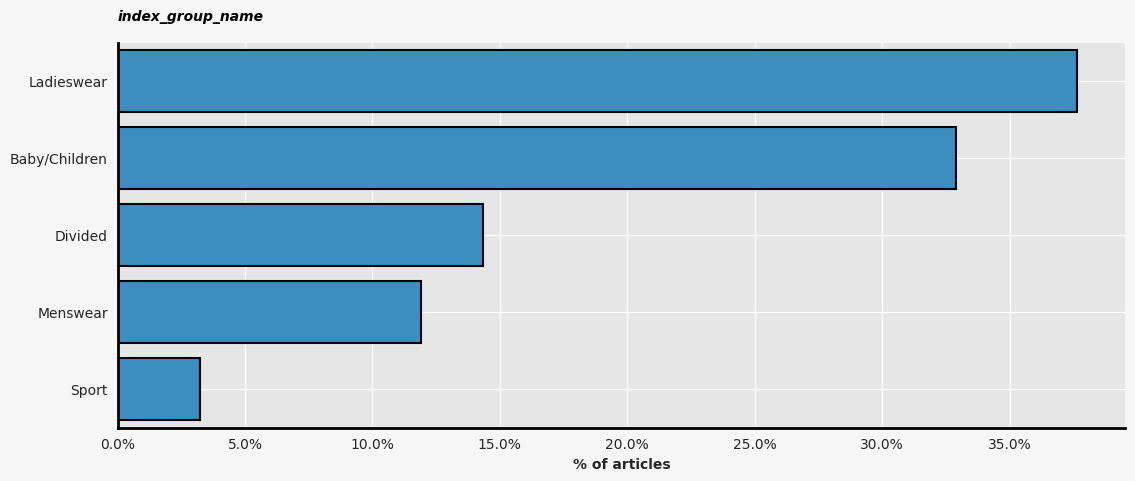

In [17]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(art, 'index_group_name', pct=True)

In [ ]:
art_divided = art[art['index_name']=='Divided']
art_divided[['prod_name','product_type_name','detail_desc','index_name','section_name','garment_group_name']].drop_duplicates().head(12)

,prod_name,product_type_name,detail_desc,index_name,section_name,garment_group_name
78,Sigge sneaker sock 5p,Socks,Fine-knit trainer socks in various colours.,Divided,Divided Basics,"Under-, Nightwear"
124,Eva chelsea boot,Boots,Chelsea boots with elasticated gores in the si...,Divided,Divided Accessories,Shoes
125,Jenny 5-pack,Socks,Fine-knit socks.,Divided,Divided Basics,"Under-, Nightwear"
149,Lena over knee.,Socks,Fine-knit over-the-knee socks.,Divided,Divided Basics,"Under-, Nightwear"
175,Tina leggings,Leggings/Tights,Leggings in extra sturdy jersey with an elasti...,Divided,Divided Basics,Jersey Basic
176,Heavy jsy long leg,Leggings/Tights,Leggings in extra sturdy jersey with an elasti...,Divided,Divided Basics,Jersey Basic
186,Jodi skirt,Skirt,"Short, bell-shaped skirt in stretch jersey wit...",Divided,Divided Basics,Jersey Basic
187,Long Leg Leggings,Leggings/Tights,Leggings in stretch jersey with an elasticated...,Divided,Divided Basics,Jersey Basic
189,Raven skirt,Skirt,Short jersey skirt with an elasticated waist.,Divided,Divided Basics,Jersey Basic
193,Carolina sweater (1),Sweater,Long-sleeved top in sweatshirt fabric with rib...,Divided,Divided Basics,Jersey Basic


In [ ]:
def show_items_in_category(column, value, no_imgs=4, title=None):
    data = art[art[column]==value]
    cat_ids = data['article_id'].iloc[:no_imgs].to_list()
    
    fig, ax = plt.subplots(1, no_imgs, figsize=(12,4))

    for i, prod_id in enumerate(cat_ids):
        folder = str(prod_id)[:2]
        file_path = '../input/h-and-m-personalized-fashion-recommendations/images/0{}/0{}.jpg'.format(folder, prod_id)

        img = plt.imread(file_path)       
        ax[i].imshow(img, aspect='equal')
        ax[i].grid(False)
        ax[i].set_xticks([], [])
        ax[i].set_yticks([], [])
        ax[i].set_xlabel(art[art['article_id']==int(prod_id)]['prod_name'].iloc[0])
    
    fig.suptitle(title)
    plt.show()

In [ ]:
show_items_in_category('index_name', 'Divided', 5, 'Articles from a "Divided" category')

FileNotFoundError: ignored

In [ ]:
art.groupby(['index_group_name', 'index_name']).size()

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
dtype: int64

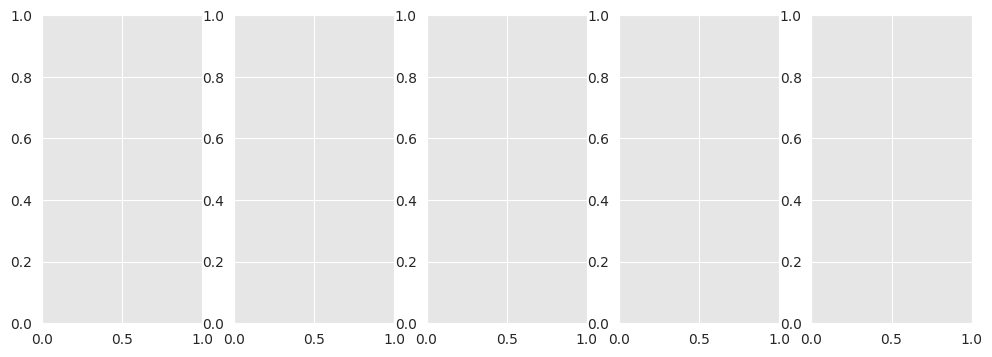

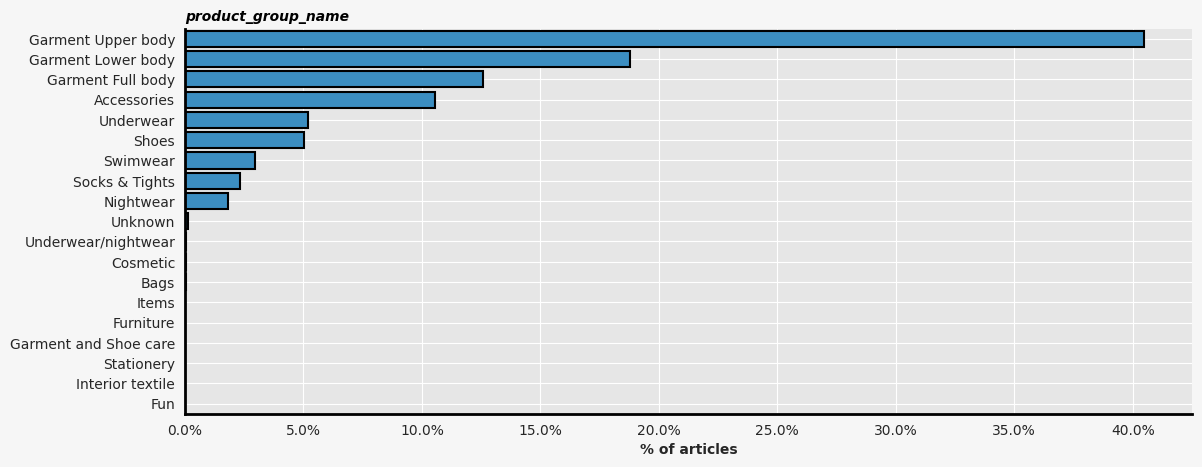

In [ ]:
plot_bar(art, 'product_group_name', pct=True)

In [ ]:
data = art['product_group_name'].value_counts()
data = data.div(data.sum()).mul(100)
pareto = data.cumsum().rename('cumulative_pct')
pareto

Garment Upper body        40.496674
Garment Lower body        59.268348
Garment Full body         71.862387
Accessories               82.434481
Underwear                 87.636202
Shoes                     92.641792
Swimwear                  95.604593
Socks & Tights            97.918364
Nightwear                 99.717648
Unknown                   99.832294
Underwear/nightwear       99.883459
Cosmetic                  99.929886
Bags                      99.953573
Items                     99.969680
Furniture                 99.981998
Garment and Shoe care     99.990525
Stationery                99.995263
Interior textile          99.998105
Fun                      100.000000
Name: cumulative_pct, dtype: float64

In [ ]:
data = pareto.reset_index()
data.columns = ['group', 'cumulative_pct']
data.index += 1
data['cumulative_pct'][6]/100

0.9264179189327472

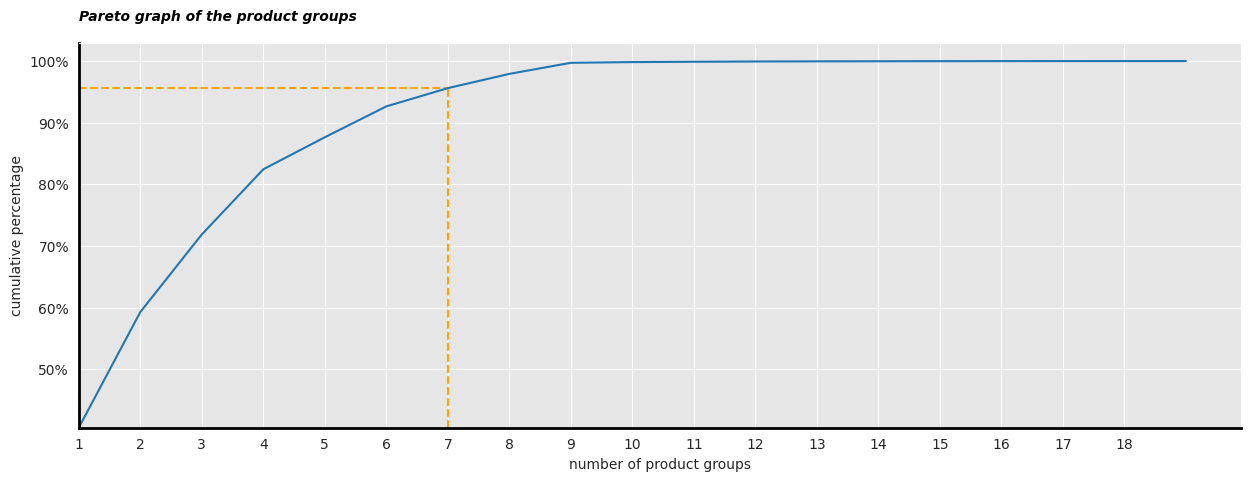

In [ ]:

fig, ax = plt.subplots(figsize=(15,5))

data = pareto.reset_index()
data.columns = ['features', 'cumulative_pct']
data.index += 1

sns.lineplot(data=data, x=data.index, y='cumulative_pct')

for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
    
ax.set_xticks(pareto.reset_index().index)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('cumulative percentage')
ax.set_xlabel('number of product groups')
ax.set_xlim(1)
ax.set_ylim(data['cumulative_pct'][1])

ax.vlines(7, data['cumulative_pct'][1], data['cumulative_pct'][7], color='orange', ls='--')
ax.hlines(data['cumulative_pct'][7], 1, 7, color='orange', ls='--')
ax.text(0, 1.05, 'Pareto graph of the product groups', color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic', transform=ax.transAxes)
plt.show()

In [ ]:
for group in art['product_group_name'].unique():
    print('Number of subcategories in "{}"" is {}.'.format(group, len(art.groupby(['product_group_name', 'product_type_name']).size()[group])))

Number of subcategories in "Garment Upper body"" is 15.
Number of subcategories in "Underwear"" is 11.
Number of subcategories in "Socks & Tights"" is 3.
Number of subcategories in "Garment Lower body"" is 5.
Number of subcategories in "Accessories"" is 38.
Number of subcategories in "Items"" is 5.
Number of subcategories in "Nightwear"" is 4.
Number of subcategories in "Unknown"" is 1.
Number of subcategories in "Underwear/nightwear"" is 2.
Number of subcategories in "Shoes"" is 16.
Number of subcategories in "Swimwear"" is 6.
Number of subcategories in "Garment Full body"" is 6.
Number of subcategories in "Cosmetic"" is 2.
Number of subcategories in "Interior textile"" is 3.
Number of subcategories in "Bags"" is 6.
Number of subcategories in "Furniture"" is 1.
Number of subcategories in "Garment and Shoe care"" is 6.
Number of subcategories in "Fun"" is 1.
Number of subcategories in "Stationery"" is 1.


In [ ]:
(art.groupby(['product_group_name', 'product_type_name']).size())

product_group_name   product_type_name
Accessories          Accessories set         7
                     Alice band              6
                     Baby Bib                3
                     Bag                  1280
                     Beanie                 56
                                          ... 
Underwear            Underwear corset        7
                     Underwear set          47
Underwear/nightwear  Sleep Bag               6
                     Sleeping sack          48
Unknown              Unknown               121
Length: 132, dtype: int64

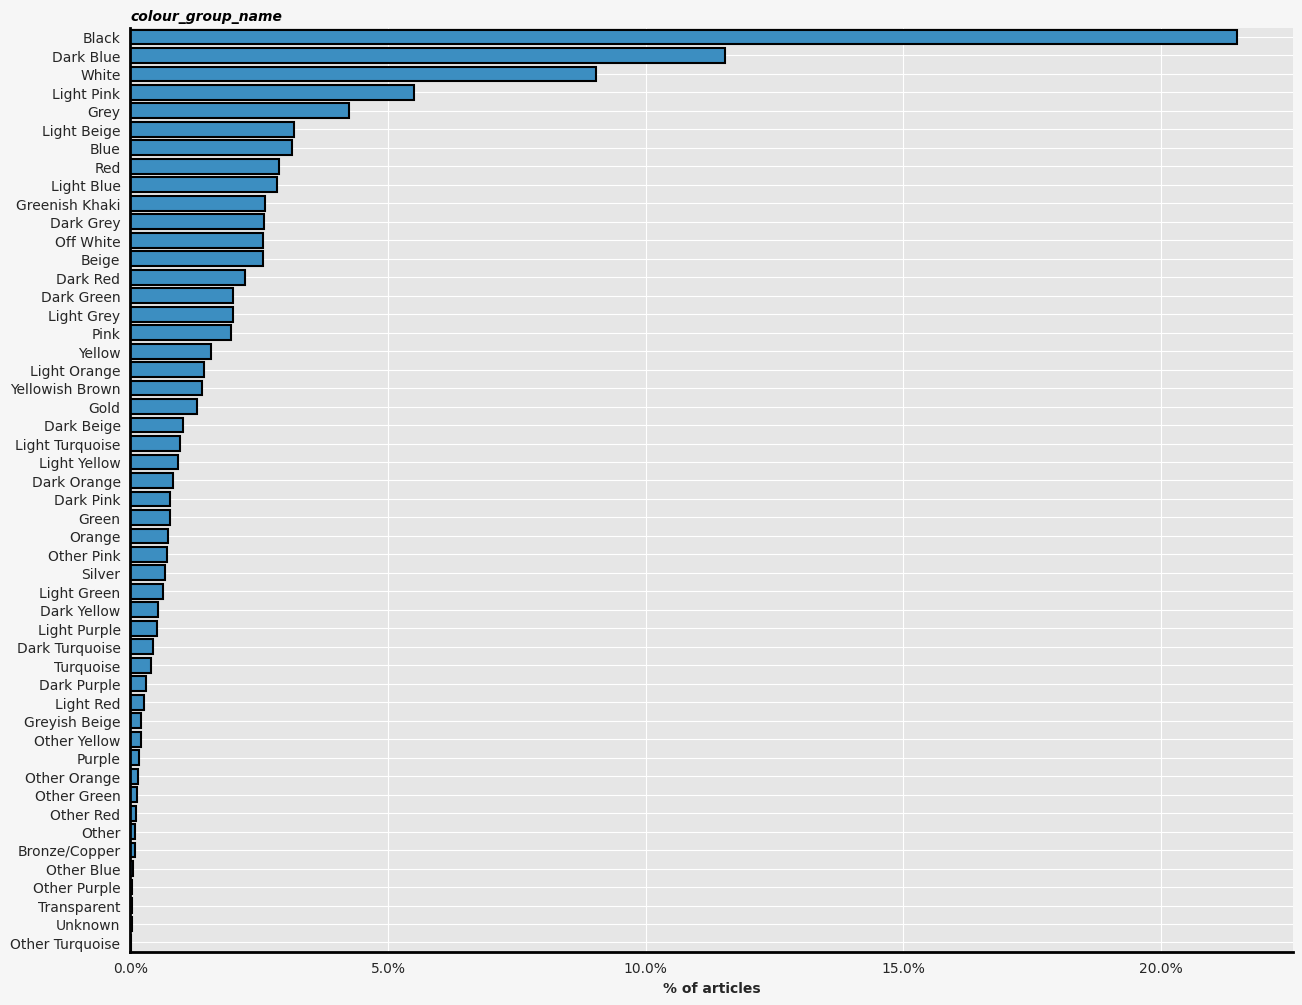

In [ ]:
plot_bar(art, 'colour_group_name', figsize=(15,12), pct=True)

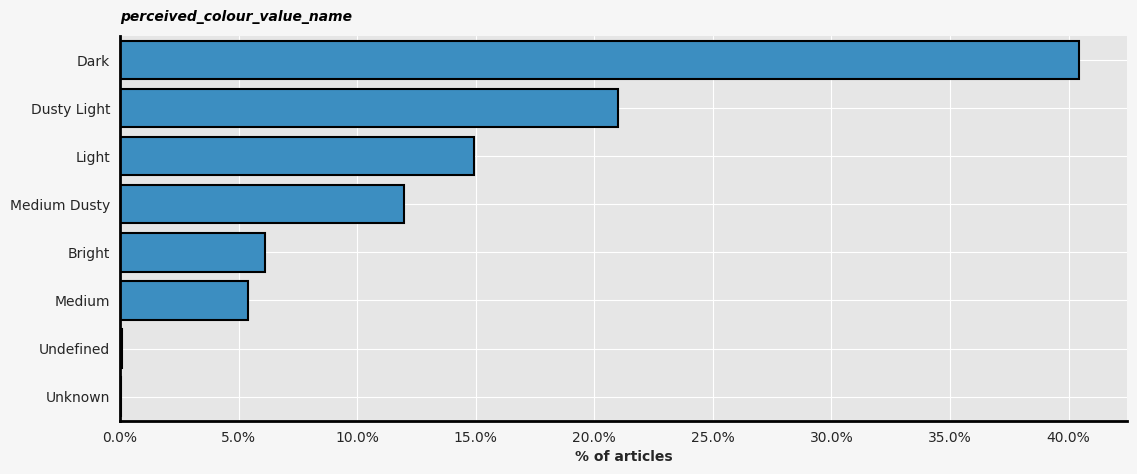

In [ ]:
plot_bar(art, 'perceived_colour_value_name', pct=True)

In [ ]:
show_items_in_category('perceived_colour_value_name', 'Dusty Light', 5, 'Dusty Light articles')

FileNotFoundError: ignored

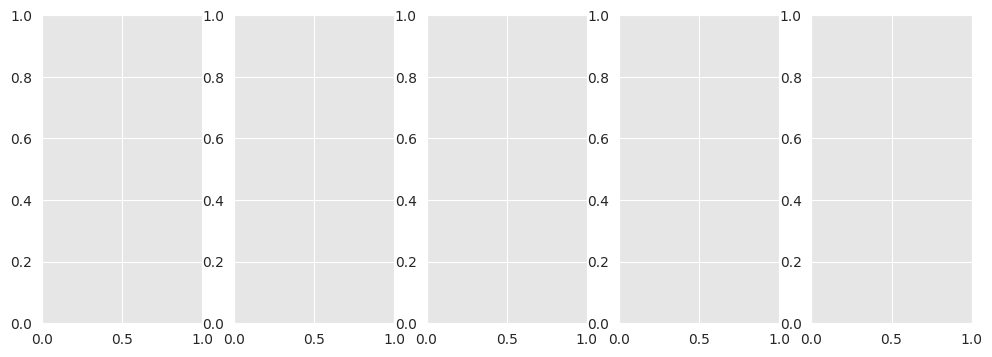

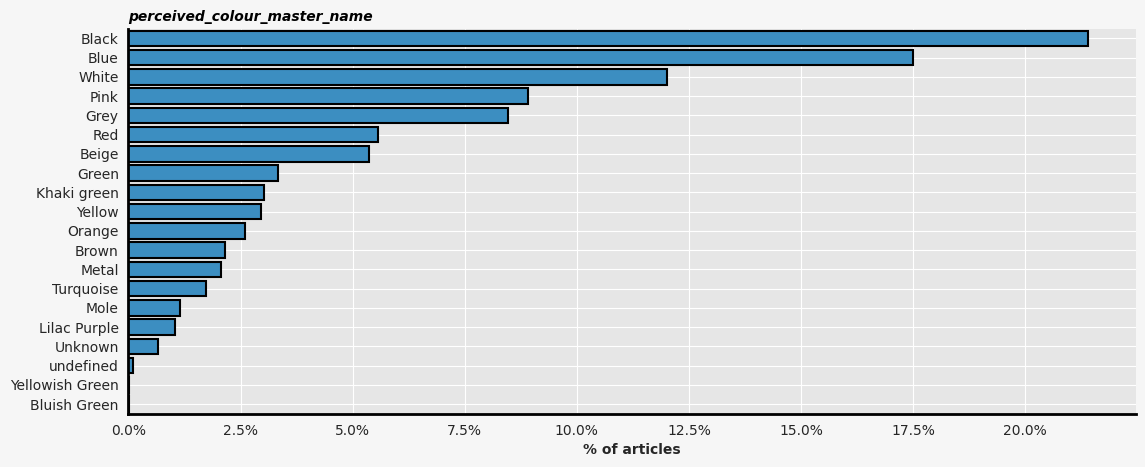

In [ ]:
plot_bar(art, 'perceived_colour_master_name', pct=True)

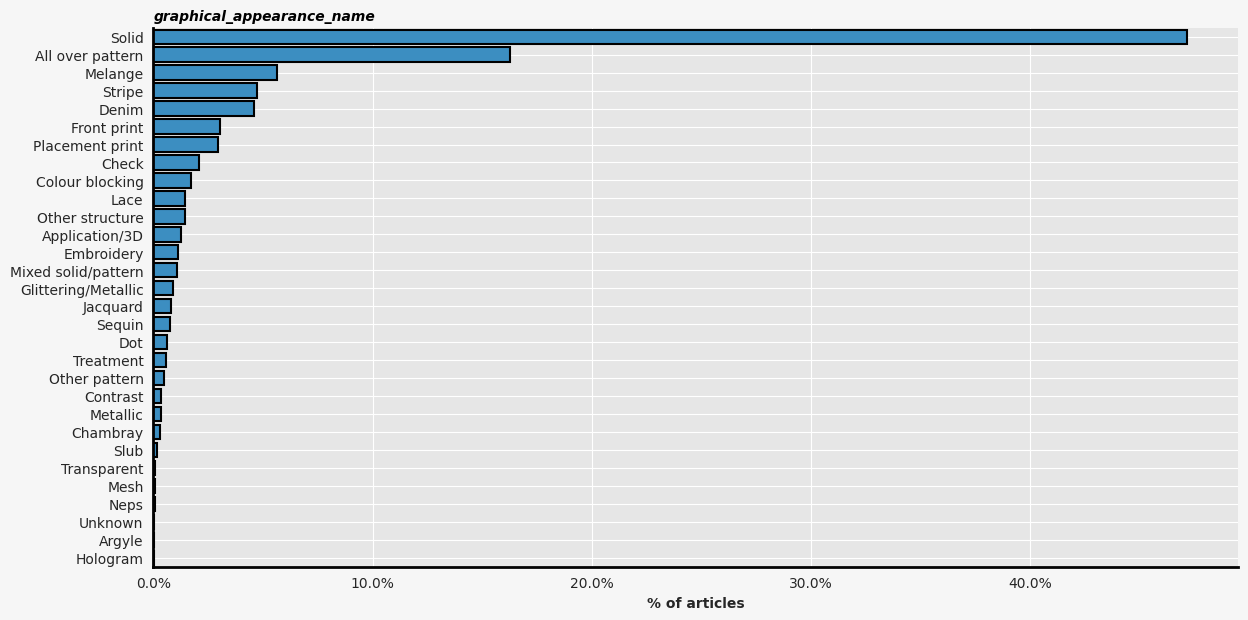

In [ ]:
plot_bar(art, 'graphical_appearance_name', figsize=(14,7), pct=True)

In [ ]:
show_items_in_category('graphical_appearance_name', 'All over pattern', 5,  'All over pattern')

FileNotFoundError: ignored

In [ ]:
show_items_in_category('graphical_appearance_name', 'Melange', 5,  'Melange')

FileNotFoundError: ignored

In [ ]:
show_items_in_category('graphical_appearance_name', 'Lace', 5,  'Lace')

FileNotFoundError: ignored

In [ ]:
show_items_in_category('graphical_appearance_name', 'Embroidery', 5,  'Embroidery')

FileNotFoundError: ignored

In [ ]:
art['detail_desc'].drop_duplicates().to_list()[:10]

['Jersey top with narrow shoulder straps.',
 'Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort.',
 'Semi shiny nylon stockings with a wide, reinforced trim at the top. Use with a suspender belt. 20 denier.',
 'Tights with built-in support to lift the bottom. Black in 30 denier and light amber in 15 denier.',
 'Semi shiny tights that shape the tummy, thighs and calves while also encouraging blood circulation in the legs. Elasticated waist.',
 'Opaque matt tights. 200 denier.',
 'Sweatshirt in soft organic cotton with a  press-stud on one shoulder (sizes 12-18 months and 18-24 months without a press-stud). Brushed inside.',
 'Two soft bandeau bras in soft jersey with side support and a silicone trim at the top.',
 'Fitted top in soft stretch jersey with a wide neckline and long sleeves.',
 'Trousers 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


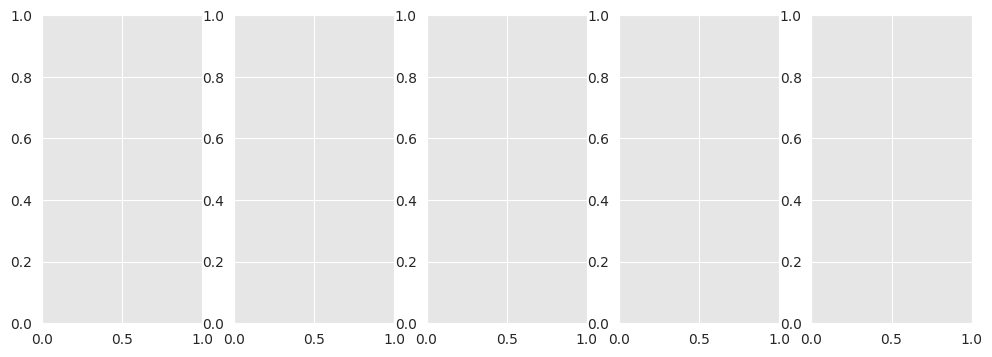

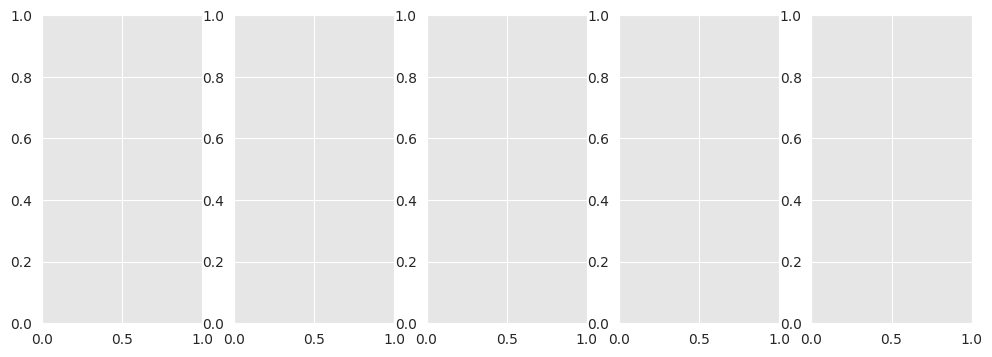

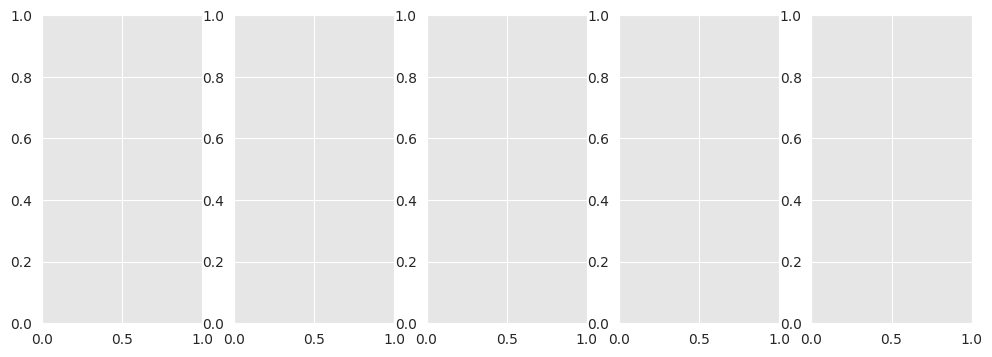

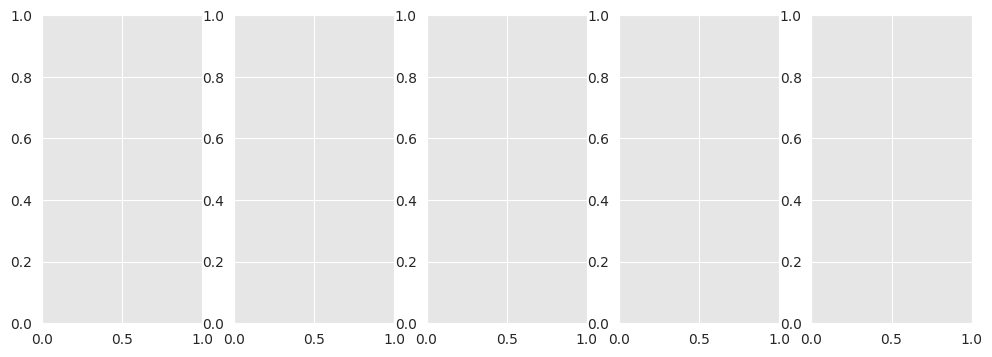

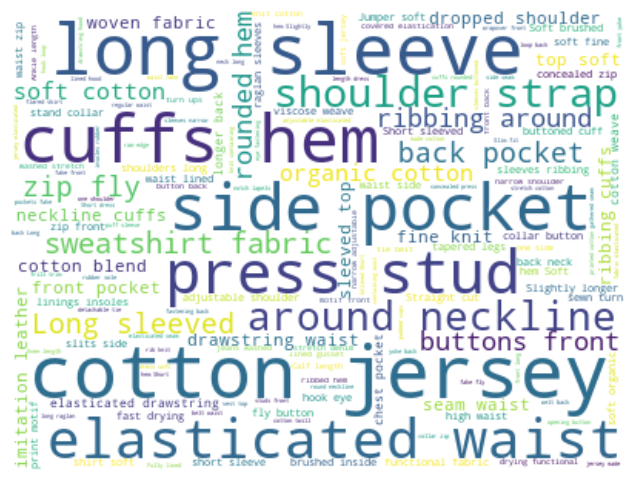

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS # library to create a wordcloud
from PIL import Image

# creating cloud of words
words_raw = art['detail_desc'].dropna().apply(nltk.word_tokenize)
bag_of_words = " ".join(words_raw.explode())
stopwords = set(STOPWORDS)

# creating cloud of words
fig, ax1 = plt.subplots(figsize=(8,6))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", height=300, contour_width=3).generate(bag_of_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

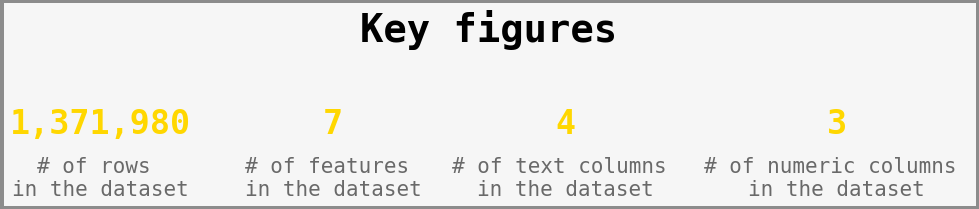

In [6]:
mpl.rcParams.update(mpl.rcParamsDefault)

cust_dtypes = cust.dtypes.value_counts()
data = cust

fig = plt.figure(figsize=(5,2),facecolor='white')

ax0 = fig.add_subplot(1,1,1)
ax0.text(1.0, 1, "Key figures",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0, 0.4, "{:,d}".format(data.shape[0]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0, 0.001, "# of rows \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(0.6, 0.4, "{}".format(data.shape[1]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0.6, 0.001, "# of features \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.2, 0.4, "{}".format(cust_dtypes[0]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.2, 0.001, "# of text columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.9, 0.4,"{}".format(cust_dtypes[1]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.9, 0.001,"# of numeric columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)
    
fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#8c8c8c')
fig.patch.set_facecolor('#f6f6f6')
ax0.set_facecolor('#f6f6f6')

plt.show()


##2. Customers database

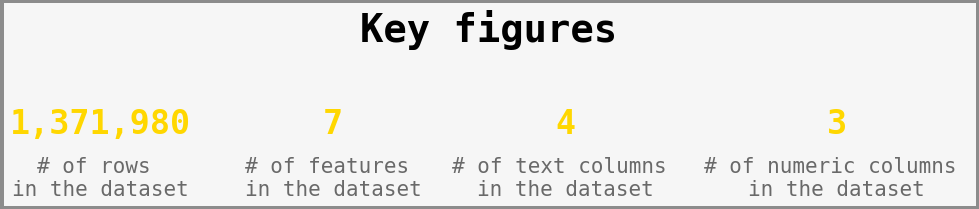

In [7]:
mpl.rcParams.update(mpl.rcParamsDefault)

cust_dtypes = cust.dtypes.value_counts()
data = cust

fig = plt.figure(figsize=(5,2),facecolor='white')

ax0 = fig.add_subplot(1,1,1)
ax0.text(1.0, 1, "Key figures",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0, 0.4, "{:,d}".format(data.shape[0]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0, 0.001, "# of rows \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(0.6, 0.4, "{}".format(data.shape[1]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0.6, 0.001, "# of features \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.2, 0.4, "{}".format(cust_dtypes[0]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.2, 0.001, "# of text columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.9, 0.4,"{}".format(cust_dtypes[1]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.9, 0.001,"# of numeric columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)
    
fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#8c8c8c')
fig.patch.set_facecolor('#f6f6f6')
ax0.set_facecolor('#f6f6f6')

plt.show()


In [8]:
data.dtypes

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

In [9]:
cust.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [10]:
cust_backup = cust.copy()
cust[['FN','Active']] = cust[['FN','Active']].fillna(0)

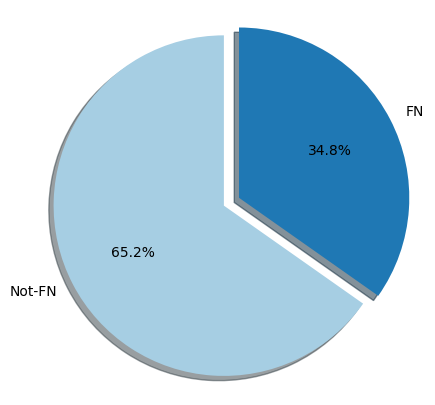

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(cust['FN'].value_counts(), explode=explode, labels=['Not-FN','FN'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show()

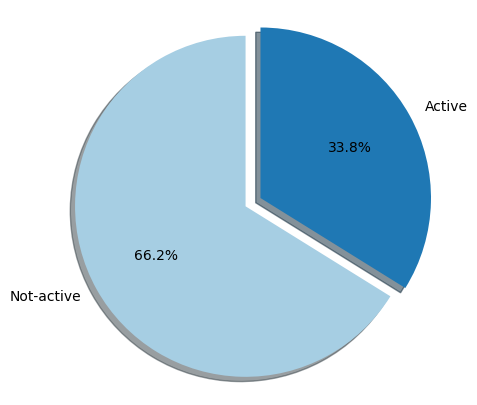

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(cust['Active'].value_counts(), explode=explode, labels=['Not-active','Active'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show()

In [18]:
FN_Active = len(cust[(cust['FN']==1) & (cust['Active']==1)])/cust.shape[0]*100
print('Percentage of customers that have both FN and Active status: {}%'.format(round(FN_Active,2)))

FN_not_active = len(cust[(cust['FN']==1) & (cust['Active']!=1)])/cust.shape[0]*100
print('Percentage of customers that have FN status but are not Active: {}%'.format(round(FN_not_active,2)))

Percentage of customers that have both FN and Active status: 33.85%
Percentage of customers that have FN status but are not Active: 0.91%


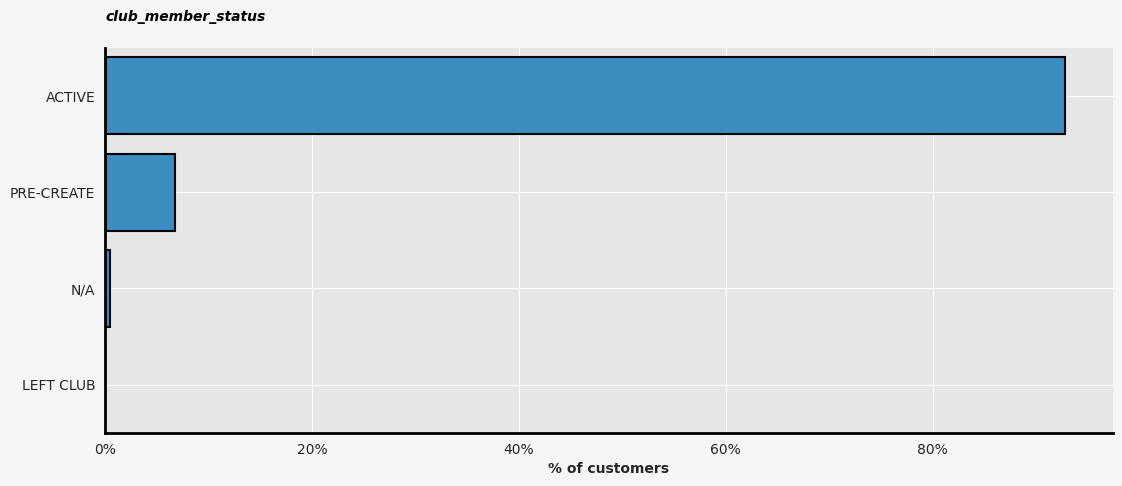

In [19]:
cust['club_member_status'] = cust['club_member_status'].fillna('N/A')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(cust, 'club_member_status', pct=True, label='customers')

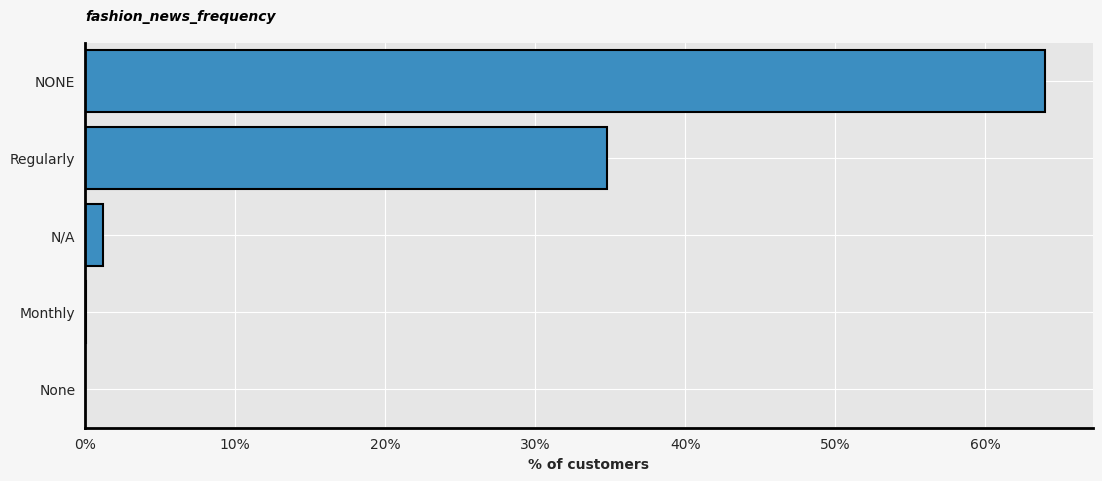

In [20]:
cust['fashion_news_frequency'] = cust['fashion_news_frequency'].fillna('N/A')
plot_bar(cust, 'fashion_news_frequency', pct=True, label='customers')

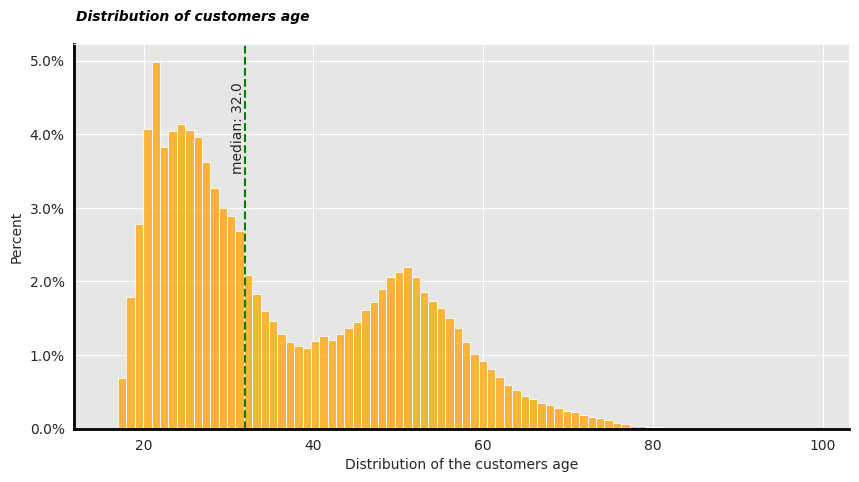

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=cust, x='age', bins=cust['age'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
median = cust['age'].median()
ax.axvline(x=median, color="green", ls="--")
ax.text(median, 3.5, 'median: {}'.format(round(median,1)), rotation='vertical', ha='right')
ax.text(12, 5.5, 'Distribution of customers age', color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
plt.show()

In [22]:

print('The olders customer is {} years old.'.format(cust['age'].max()))

The olders customer is 99.0 years old.


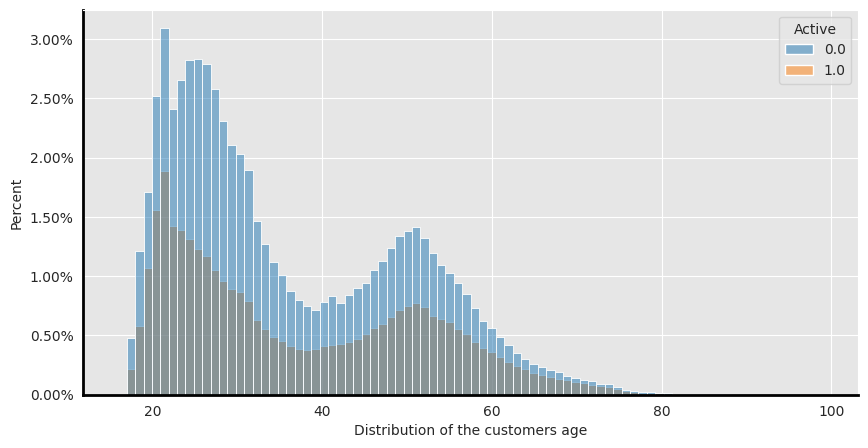

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=cust, x='age', bins=cust['age'].nunique(), hue='Active', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [24]:
active_age_ratio = cust.groupby('age')['Active'].value_counts(normalize=True).mul(100)
active_age_ratio = active_age_ratio.rename('Active_ratio', inplace=True).reset_index()
active_age_ratio = active_age_ratio[active_age_ratio['Active']==1]
active_age_ratio['Active'] = active_age_ratio['Active'].astype(int)
active_age_ratio['age'] = active_age_ratio['age'].astype(int)

In [25]:
active_age_ratio

,age,Active,Active_ratio
1,16,1,45.341615
3,17,1,31.132879
5,18,1,32.315093
7,19,1,38.494179
9,20,1,38.211102
...,...,...,...
156,94,1,33.333333
158,95,1,20.000000
161,97,1,25.000000
163,98,1,14.285714


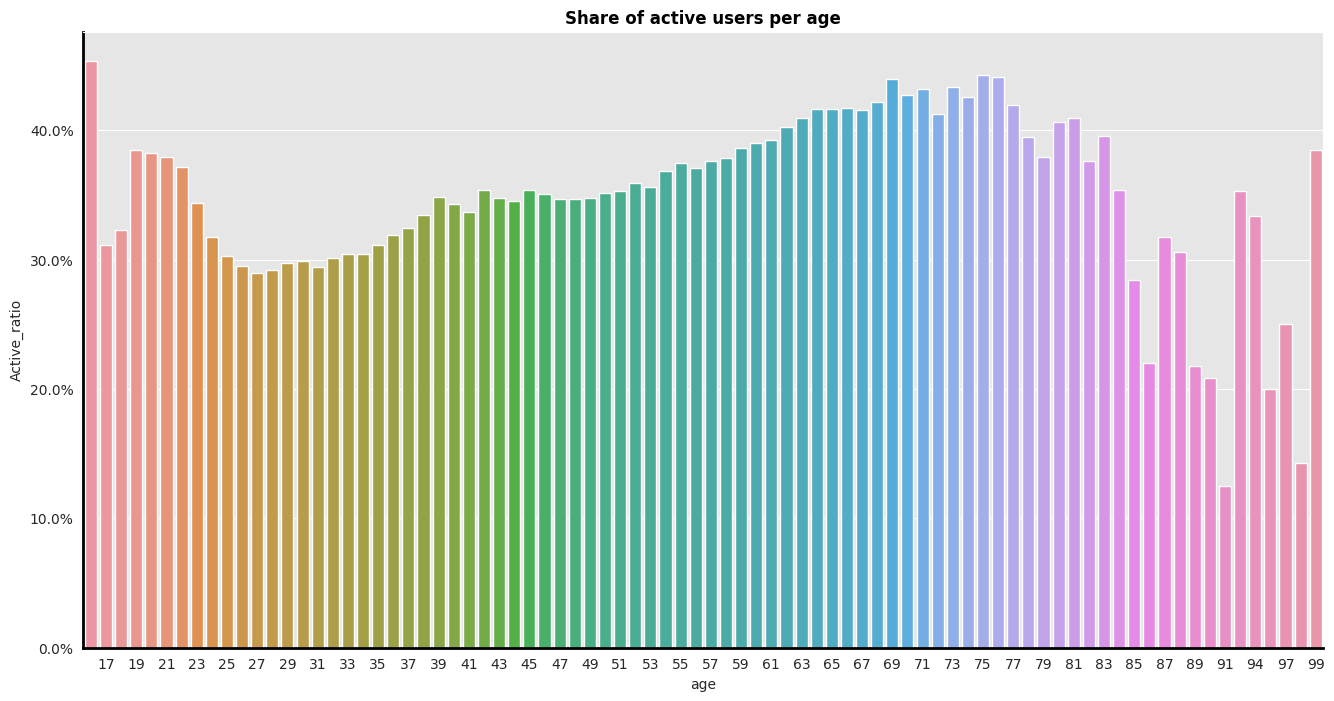

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='age', y='Active_ratio', data=active_age_ratio)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
ax.set_title("Share of active users per age", color='black', fontsize=12, weight='bold')
plt.show()


## 3. Transactions

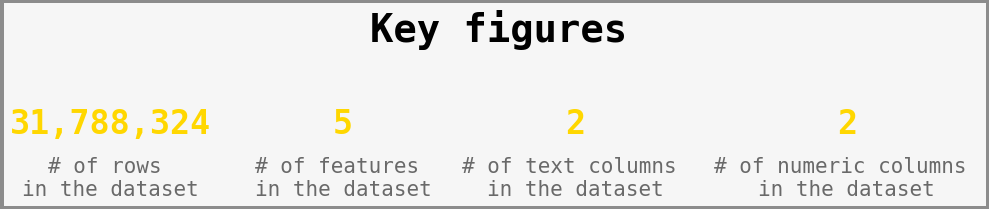

In [30]:
mpl.rcParams.update(mpl.rcParamsDefault)

trans_dtypes = trans.dtypes.value_counts()
data = trans

fig = plt.figure(figsize=(5,2),facecolor='white')

ax0 = fig.add_subplot(1,1,1)
ax0.text(1.0, 1, "Key figures",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0, 0.4, "{:,d}".format(data.shape[0]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0, 0.001, "# of rows \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(0.6, 0.4, "{}".format(data.shape[1]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0.6, 0.001, "# of features \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.2, 0.4, "{}".format(trans_dtypes[0]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.2, 0.001, "# of text columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.9, 0.4,"{}".format(trans_dtypes[1]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.9, 0.001,"# of numeric columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)

fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#8c8c8c')
fig.patch.set_facecolor('#f6f6f6')
ax0.set_facecolor('#f6f6f6')
    
plt.show()


In [31]:
trans.head()


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [32]:
trans.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

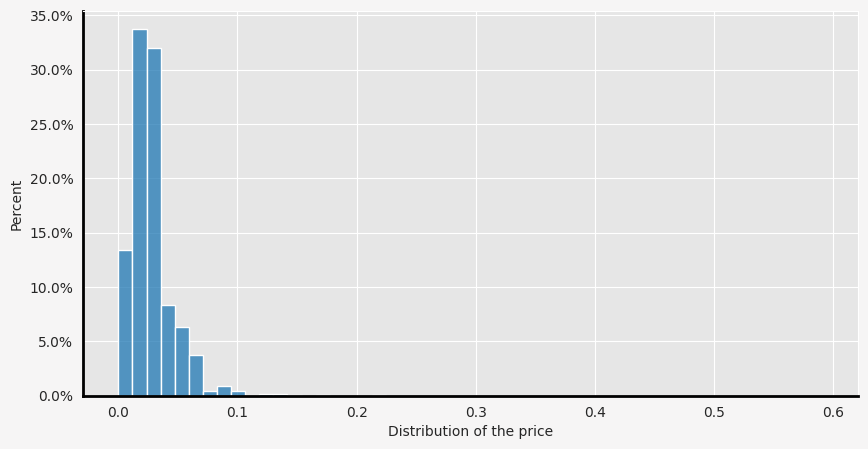

In [33]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
ax = sns.histplot(data=trans, x='price', bins=50, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

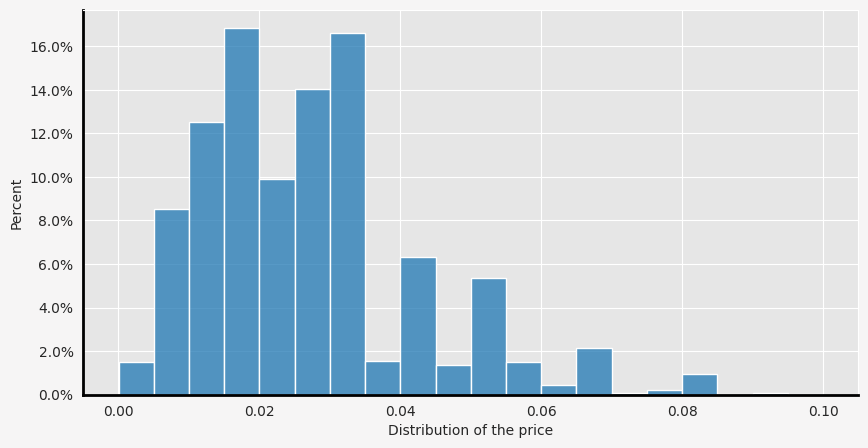

In [34]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
data = trans[trans['price']<0.1]
ax = sns.histplot(data=data, x='price', bins=20, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [35]:
trans['t_dat'] = pd.to_datetime(trans['t_dat'])

In [36]:
begin = trans['t_dat'].min()
end = trans['t_dat'].max()
print('Date range is from {} to {}.'.format(begin.date(), end.date()))

Date range is from 2018-09-20 to 2020-09-22.


In [37]:

t_per_day = trans.groupby('t_dat',as_index=False).count()

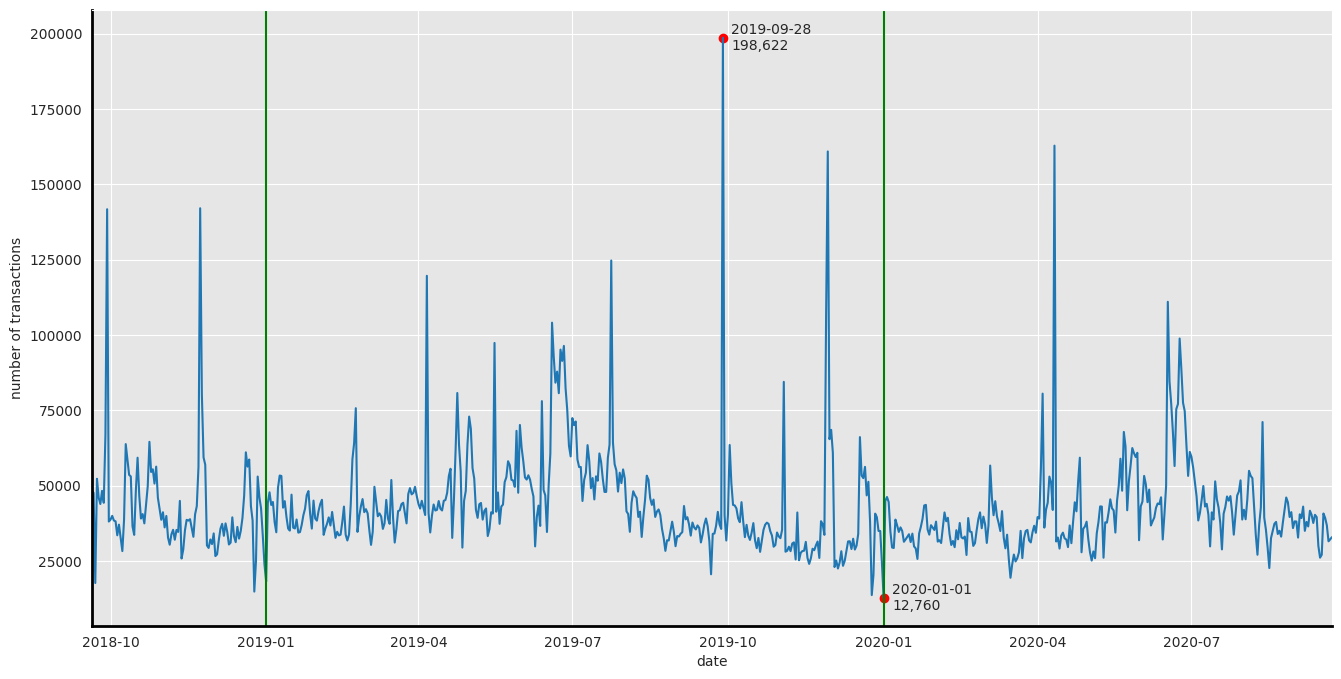

In [38]:
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(data=t_per_day, x='t_dat',y='customer_id')

ax.set_xlabel('date')
ax.set_ylabel('number of transactions')

ax.axvline(x=dt.datetime(2019,1,1), c='green')
ax.axvline(x=dt.datetime(2020,1,1), c='green')

max_t = t_per_day['customer_id'].max()
max_t_date = t_per_day[t_per_day['customer_id']==max_t]['t_dat']
ax.scatter(max_t_date, max_t, c='red')
ax.text(max_t_date+pd.DateOffset(days=5), max_t-4000, '{}\n{:,d}'.format(max_t_date.iloc[0].date(), max_t))

min_t = t_per_day['customer_id'].min()
min_t_date = t_per_day[t_per_day['customer_id']==min_t]['t_dat']
ax.scatter(min_t_date, min_t, c='red')
ax.text(min_t_date+pd.DateOffset(days=5), min_t-4000, '{}\n{:,d}'.format(min_t_date.iloc[0].date(), min_t))
ax.set_xlim(trans['t_dat'].min(),trans['t_dat'].max())

for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')

plt.show()


In [39]:
trans_gr_month = trans.groupby('t_dat').size().rename("no_transactions")
print(trans_gr_month)
trans_gr_month = trans_gr_month.reset_index()
trans_gr_month['month_year'] = trans_gr_month['t_dat'].dt.to_period('M')

t_dat
2018-09-20    48399
2018-09-21    47543
2018-09-22    17635
2018-09-23    52230
2018-09-24    45984
              ...  
2020-09-18    39284
2020-09-19    36796
2020-09-20    31489
2020-09-21    32130
2020-09-22    32866
Name: no_transactions, Length: 734, dtype: int64


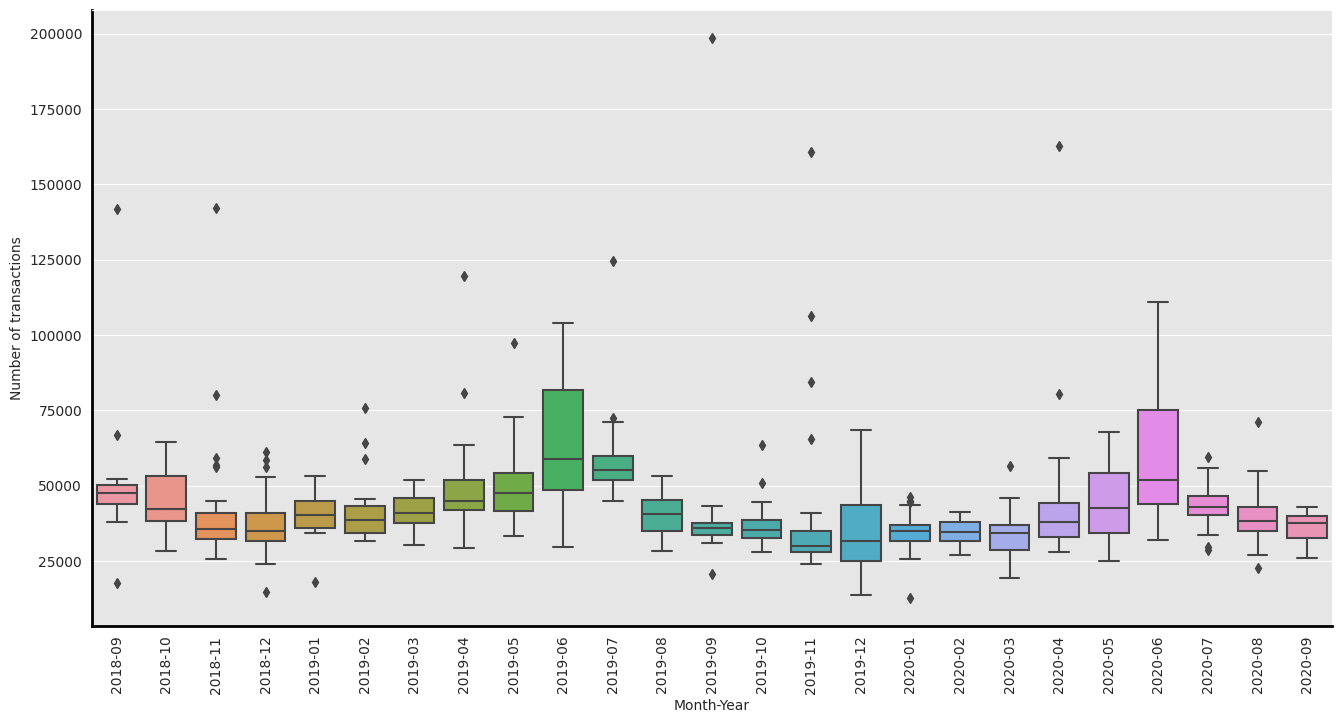

In [40]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(x="month_year", y='no_transactions', data=trans_gr_month)
plt.xticks(rotation=90)
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of transactions')
plt.show()

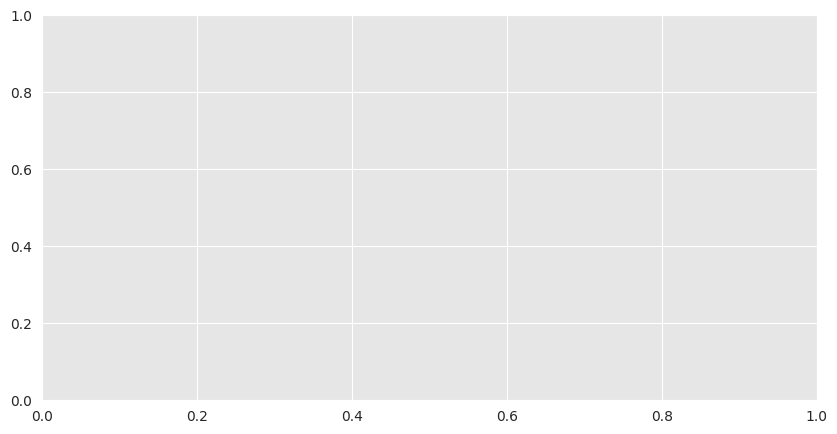

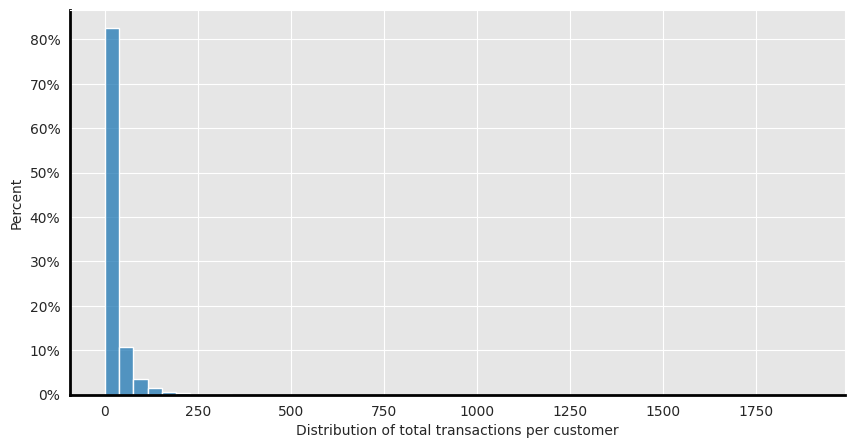

In [42]:
t_by_customer = trans.groupby('customer_id', as_index=False).size()

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=t_by_customer, x='size', bins=50, stat="percent")
ax.set_xlabel('Distribution of total transactions per customer')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

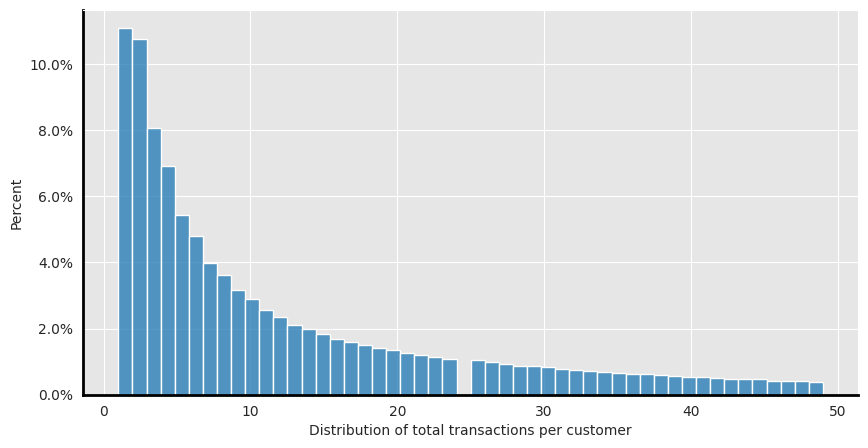

In [43]:
t_by_customer_50tr = t_by_customer[t_by_customer['size'] < 50]

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=t_by_customer_50tr, x='size', bins=50, stat="percent")
ax.set_xlabel('Distribution of total transactions per customer')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

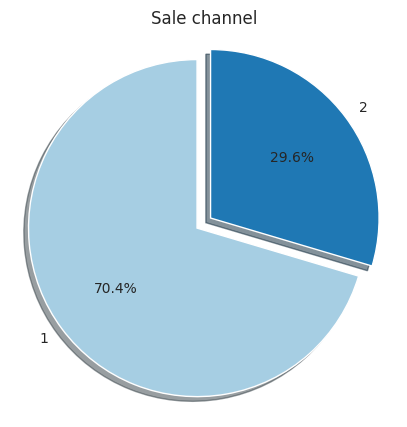

In [44]:

fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(trans['sales_channel_id'].value_counts(), explode=explode, labels=['1','2'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
ax.set_title('Sale channel')
plt.show()

In [45]:
#trans['month'] = trans['t_dat'].dt.month
#trans['year'] = trans['t_dat'].dt.year
trans['year_month'] = trans['t_dat'].dt.to_period('M')
trans.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year_month
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09


In [46]:
trans_grouped = trans.groupby(['year_month', 'article_id']).size().rename('total_per_article').to_frame()

In [47]:
trans_grouped.head()

total_per_article
year_month article_id                   
2018-09    108775015                 662
           108775044                 283
           108775051                  59
           110065001                  69
           110065002                  27

In [48]:
trans_grouped.reset_index(inplace=True)

In [49]:
art_trans = pd.merge(art[['article_id', 'index_name']], trans_grouped, on='article_id')

In [50]:
art_trans = art_trans.groupby(['year_month','index_name'])['total_per_article'].sum().to_frame()
art_trans.head()

total_per_article
year_month index_name                                       
2018-09    Baby Sizes 50-98                            10588
           Children Accessories, Swimwear               4514
           Children Sizes 134-170                      28524
           Children Sizes 92-140                       24272
           Divided                                    139007